# Sentiment Analysis 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

from urlextract import URLExtract

import logging

import numpy as np
from numpy import random
#import gensim
import nltk



import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
# df = pd.read_csv ('../data/training.1600000.processed.noemoticon.csv',encoding='latin1',header=None)
df = pd.read_csv ('../data/training.1600000.processed.noemoticon.csv',encoding='latin1',names=(['id','date','query','name','message']))
df.head()

,id,date,query,name,message
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# MEETING THE FEATURES

In [3]:
print(df.shape,"\n")
print(df.info(),"\n")
print(df.isnull().sum(),"\n")

(1600000, 5) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 4
Data columns (total 5 columns):
id         1600000 non-null int64
date       1600000 non-null object
query      1600000 non-null object
name       1600000 non-null object
message    1600000 non-null object
dtypes: int64(1), object(4)
memory usage: 73.2+ MB
None 

id         0
date       0
query      0
name       0
message    0
dtype: int64 



In [4]:
print((df["query"] == "NO_QUERY").sum())

1600000


# ERASING THAT FEATURES THAT ARE NOT USSEFUL

In [5]:
df.drop(['date','query','name'],axis=1,inplace=True) 
df.head()

,id,message
0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,is upset that he can't update his Facebook by ...
0,1467810917,@Kenichan I dived many times for the ball. Man...
0,1467811184,my whole body feels itchy and like its on fire
0,1467811193,"@nationwideclass no, it's not behaving at all...."


# CLEANING MESSAGES

In [7]:
#CREATING PATERNS TO BE REMOVED
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [16]:
def clean_text(text):
    """
        text: a string       
        return: modified initial string
    """
    text = BeautifulSoup(text, "html.parser").text # HTML decoding
    extractor = URLExtract()
    
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['message'] = df['message'].apply(clean_text)

KeyboardInterrupt: 

In [15]:
df.head()

,id,message
0,1467810369,switchfoot http twitpiccom 2y1zl awww thats bu...
0,1467810672,upset cant update facebook texting might cry r...
0,1467810917,kenichan dived many times ball managed save 50...
0,1467811184,whole body feels itchy like fire
0,1467811193,nationwideclass behaving im mad cant see


In [ ]:
# counting all the words
print(df['post'].apply(lambda x: len(x.split(' '))).sum())

In [8]:
df = df.dropna(how='any')

df = pd.get_dummies(df, columns = ['Location','WindGustDir','WindDir9am', 'WindDir3pm' ])

df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace=True)

df.dtypes


MinTemp                      float64
MaxTemp                      float64
Rainfall                     float64
Evaporation                  float64
Sunshine                     float64
WindGustSpeed                float64
WindSpeed9am                 float64
WindSpeed3pm                 float64
Humidity9am                  float64
Humidity3pm                  float64
Pressure9am                  float64
Pressure3pm                  float64
Cloud9am                     float64
Cloud3pm                     float64
Temp9am                      float64
Temp3pm                      float64
RainToday                      int64
RainTomorrow                   int64
Location_AliceSprings          uint8
Location_Brisbane              uint8
Location_Cairns                uint8
Location_Canberra              uint8
Location_Cobar                 uint8
Location_CoffsHarbour          uint8
Location_Darwin                uint8
Location_Hobart                uint8
Location_Melbourne             uint8
L

# Column "RainTomorrow" is our target

In [9]:
def test_model(model, X, y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=5)
    model.fit(X_train, Y_train)
    print(f"{type(model).__name__} -> {model.score(X_test, Y_test)}")


def test_classification(X, y):
    classifiers = [
        SGDClassifier(max_iter=100),
        Perceptron(random_state=5),
    ]
    for classifier in classifiers:
        test_model(classifier, X, y)

def test_regression(X, y):
    regressors = [
        LinearRegression(),
        RandomForestRegressor(n_estimators=10)
    ]
    for regressor in regressors:
        test_model(regressor, X, y)


In [10]:
test_regression(df.drop(['RainTomorrow'], axis=1), df['RainTomorrow'])
test_classification(df.drop(['RainTomorrow'], axis=1), df['RainTomorrow'])

LinearRegression -> 0.37157259275626886
RandomForestRegressor -> 0.3604170583896208


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier -> 0.8292067243138729
Perceptron -> 0.8510661152586068


In [11]:
df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
5939,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,1,0,0,0
5940,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,1,0,0,0,0,0
5942,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,1,0,0,0,0,0,0,0,0,0
5943,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,1
5944,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

t0 = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=5)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)

print('Accuracy :', score)
print('Time taken :', time.time()-t0)

Accuracy : 0.8212041463021644
Time taken : 2.1046040058135986


In [13]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

t0=time.time()

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
clf_dt = DecisionTreeClassifier(random_state=5)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy :', score)
print('Time taken :' , time.time()-t0)


Accuracy : 0.7953166120629465
Time taken : 1.2662949562072754


In [14]:
# #SUPPORT VECTOR
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# t0=time.time()
# # X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

# clf_svc = svm.SVC(kernel='linear')
# clf_svc.fit(X_train,y_train)
# y_pred = clf_svc.predict(X_test)
# score = accuracy_score(y_test,y_pred)
# print('Accuracy :', score)
# print('Time taken :' , time.time()-t0)

In [25]:
from sklearn import tree

perceptron = Perceptron()
perceptron = perceptron.fit(X_train, y_train)
perceptron.score(X_test, y_test)

0.8021913099521993

# Este modelo tiene la misma precision de predecir un uno o un cero (0,84), precison es que está muy seguro de que será 1 y de los 1 predichos, sólo ha acertado un 33% de ellos (que son con los que se queda porque están seguros de ellos, el 67% son dudosos)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, perceptron.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.81      0.86     14439
           1       0.54      0.76      0.63      4180

    accuracy                           0.80     18619
   macro avg       0.73      0.79      0.75     18619
weighted avg       0.84      0.80      0.81     18619



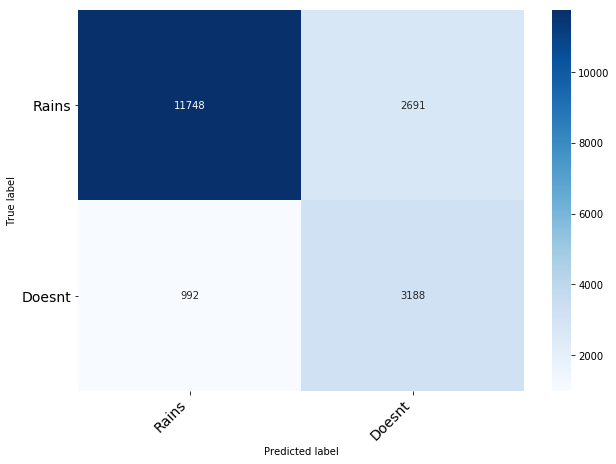

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="Blues")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, perceptron.predict(X_test))

print_confusion_matrix(conf, ['Rains', 'Doesnt'])